# Introduction to Data Analysis : Mini-Project

### 1. Exploratory data analysis

Spotify provides an API service that allows us to access to song’s audio features of archive of millions of songs like  level of acousticness,song’s tempo, or the level of danceability.
link of the features: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/
Our study will focuse on a dataset of 18835 different songs.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import itertools


In [3]:
df1 = pd.read_csv('song_data.csv')
df1.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [4]:
df1.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

Our dataset has not missing values. We can start to explore it !

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


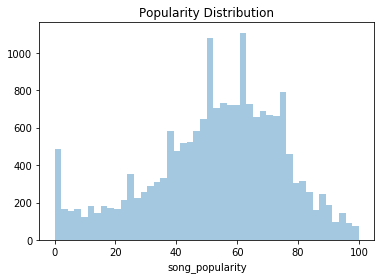

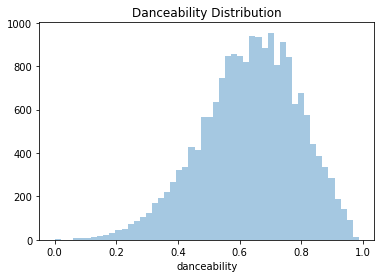

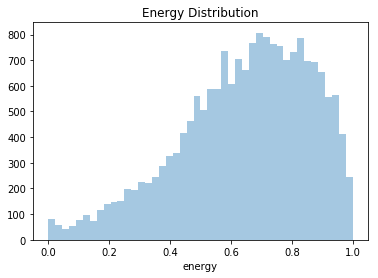

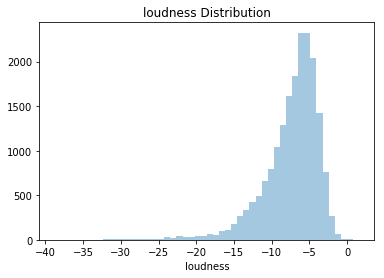

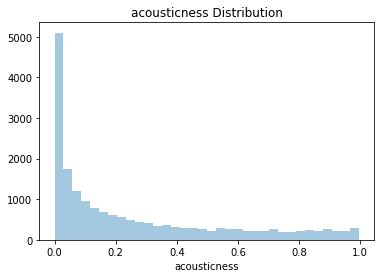

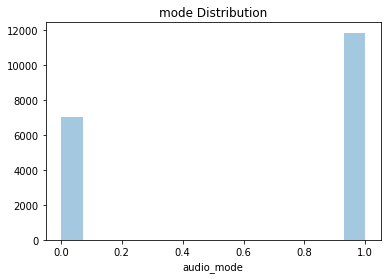

In [5]:
ax = sns.distplot(df1['song_popularity'], kde=False).set_title('Popularity Distribution')
plt.show()
ax = sns.distplot(df1['danceability'], kde=False).set_title('Danceability Distribution')
plt.show()
ax = sns.distplot(df1['energy'], kde=False).set_title('Energy Distribution')
plt.show()
ax = sns.distplot(df1['loudness'], kde=False).set_title('loudness Distribution')
plt.show()
ax = sns.distplot(df1['acousticness'], kde=False).set_title('acousticness Distribution')
plt.show()
ax = sns.distplot(df1['audio_mode'], kde=False).set_title('mode Distribution')


Danceability appears to bo normally distributed with a mean around 0.65.
The popularity is also normally distributed with a mean aroud 60.
According to the plot distribution,it seems there is maybe a correlation between energy and loudness. 
The songs representing in spotify tend to have a low acousticness, it means there are more electronic instruments.
In addition, The songs representing in spotify tend to have a high loudness, it means that the volume is high.
We can describe a song by his mode : minor (0) or major(1). It looks like that the most widespread mode is the 'major' mode.

Let's see if there is some correlation between certain value.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'correlation between some features')

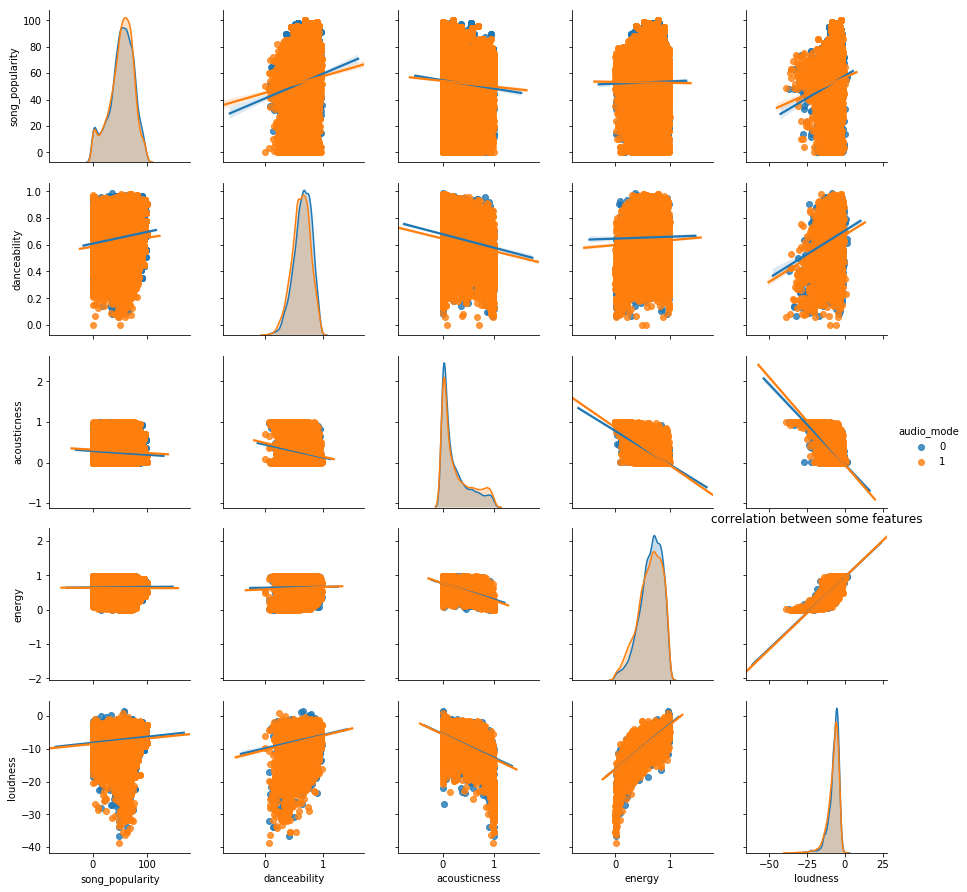

In [6]:
sns.pairplot(df1,vars=["song_popularity", "danceability","acousticness","energy","loudness"],hue='audio_mode',kind="reg")
plt.title('correlation between some features')

Text(0.5,1,'correlation between loudness and energy')

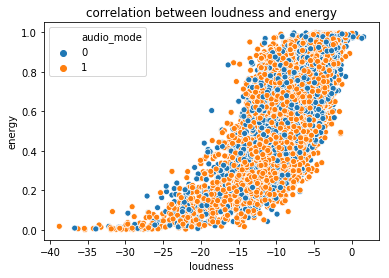

In [7]:
sns.scatterplot(x = 'loudness', y = 'energy', data = df1, hue='audio_mode')
plt.title('correlation between loudness and energy')

We observe, more the 'loudness' increases more the 'energy' is higher.
The 'loudness' represents the strenght of the volume and the 'energy' represents a preceptual measure of activity and intensity, therefore, a positive correlation between them seems us logical and possible.
In addition, we can notice that the mode of a song doesn't incluence any features. Indeed, for 'major' or 'minor', the curve remain the same.
So, there isn't correlation between the mode of a song and the his popularity, loudness, acousticness, energy or danceability.

Text(0.5,1,'correlation between loudness and energy')

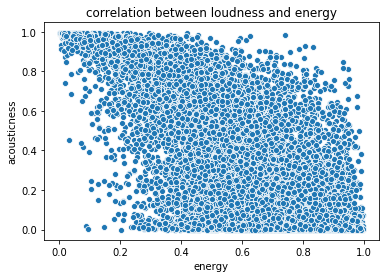

In [8]:
sns.scatterplot(x = 'energy', y = 'acousticness', data = df1)
plt.title('correlation between loudness and energy')

It seems there is a negative correlation between the energy and the acousticness. Indeed, more a song is energic less acoustic is a song.
less a song is acoustic, more the instruments used are elecronics. That's maybe the reason why the song seems more 'energetic'.

Now we want to know what is the most poular genre. We have to import a new dataset from the same spotify API that contains information about the genre.
This dataset contains 300000 different songs. We have prefered to use the first dataset for the following analyses because high run time.

In [11]:
df4 = pd.read_csv('SpotifyFeatures.csv')
df4.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Opera,Giuseppe Verdi,"Stiffelio, Act III: Ei fugge! … Lina, pensai c...",7EsKYeHtTc4H4xWiTqSVZA,21,0.986,0.313,490867,0.23100,0.000431,C#,0.0964,-14.287,Major,0.0547,86.001,4/4,0.0886
1,Opera,Giacomo Puccini,Madama Butterfly / Act 1: ... E soffitto e pareti,7MfmRBvqaW0I6UTxXnad8p,18,0.972,0.360,176797,0.20100,0.028000,D#,0.1330,-19.794,Major,0.0581,131.798,4/4,0.3690
2,Opera,Giacomo Puccini,"Turandot / Act 2: Gloria, gloria, o vincitore",7pBo1GDhIysyUMFXiDVoON,10,0.935,0.168,266184,0.47000,0.020400,C,0.3630,-8.415,Major,0.0383,75.126,3/4,0.0696
3,Opera,Giuseppe Verdi,"Rigoletto, Act IV: Venti scudi hai tu detto?",02mvYZX5aKNzdqEo6jF20m,17,0.961,0.250,288573,0.00605,0.000000,D,0.1200,-33.440,Major,0.0480,76.493,4/4,0.0380
4,Opera,Giuseppe Verdi,"Don Carlo / Act 4: ""Ella giammai m'amò!""",03TW0jwGMGhUabAjOpB1T9,19,0.985,0.142,629760,0.05800,0.146000,D,0.0969,-23.625,Major,0.0493,172.935,4/4,0.0382


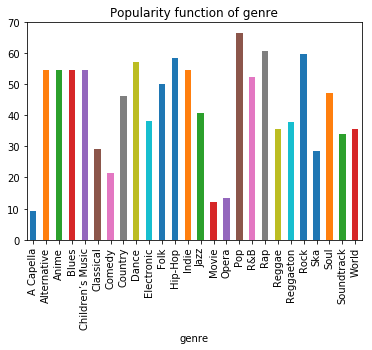

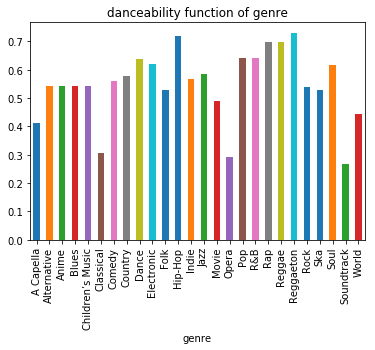

In [12]:
x=df4.groupby(['genre']).mean()
x['popularity'].plot(kind='bar', title='Popularity function of genre')
plt.show()
x['danceability'].plot(kind='bar', title='danceability function of genre')

It is interesting to notice that the the less popular songs are "A capella", "classical" or "opera" songs that are known as acoustic music (without electronics instruments), with a lower energy in wich it is impossible to dance on it, so maybe with a low danceability.
Therefore, we want to show that the good danceability  of a song is an essential criterion for a music to be popular.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


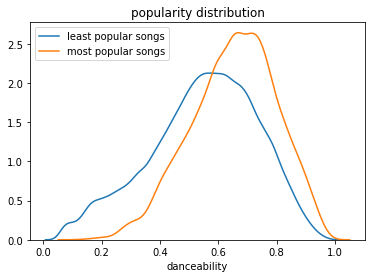

In [13]:
lessPopular = df4[(df4['popularity']< 70 ) ]
morePopular = df4[(df4['popularity']>= 70) ]
plt.show()
yo = lessPopular[['danceability','popularity']]
ax = sns.distplot(yo.danceability, rug=False, hist=False, label="least popular songs")

yo = morePopular[['danceability','popularity']]
ax = sns.distplot(yo.danceability, rug=False, hist=False, label="most popular songs").set_title("popularity distribution")

This chart shows that the most popular songs (popularity>70) have a higher danceability. The orange curve have a mean around 0.75, while the blue curve have a mean around 0.6.

### 2. Estimation and hypothesis testing

We first divided our dataset in 2 categories according to the 'danceability' :
_ lessDance, which is the group where songs have a low danceability (<0.7)
_ moreDance, which is the group where songs have a high danceability (>0.7)

Null hypothesis : Two groups above have the same mean of popularity, i.e. diff = mean(moreDance) - mean(lessDance) = 0
Alternative hypothesis : Two groups above have not the same mean of popularity.

By these hypothesis we want to check if the danceability of a song influences his popularity.

In [14]:
#We divide the dataset in 2 parts
lessDance = df1[(df1['danceability']< 0.7 ) ]
moreDance = df1[(df1['danceability']>= 0.7 ) ]

In [15]:
 #creation of bootstrap fonction 
def bootstrap_mean(original_sample, column_name, num_replications):
    original_sample_size = original_sample.shape[0]
    original_sample_popularity = original_sample[[column_name]]
    means = np.zeros(num_replications)
    for i in range(num_replications):
        bootstrap_sample = original_sample_popularity.sample(original_sample_size, replace=True)
        resampled_mean = bootstrap_sample.mean()
        means[i] = resampled_mean
    
    return means

2.7577214292525767
4.06419547712369


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


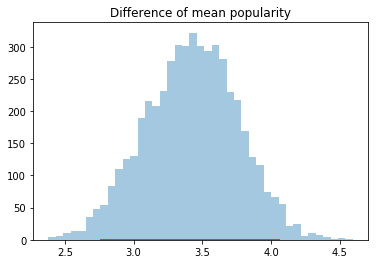

In [16]:
means_bootstrapped_less = bootstrap_mean(lessDance, 'song_popularity', 5000)
means_bootstrapped_more = bootstrap_mean(moreDance, 'song_popularity', 5000)

diff = np.subtract(means_bootstrapped_more,means_bootstrapped_less) #let's take the substract of 2 bootstrap above

#create the Confidence interval
left = np.percentile(diff, 2.5, interpolation='higher') 
right = np.percentile(diff, 97.5, interpolation='higher')
print(left)
print(right)


ax = sns.distplot(diff, kde=False).set_title('Difference of mean popularity')

plt.hlines(0, left, right, colors='red', linestyles='solid') # show line of values between 2.5 and 97.5 percentiles
plt.show()

We wanted to verify if diff = 0. Here, the confidence interval [2.77-4.07] does not contain 0, so we have to reject the Null hypothesis. 
So we can conclude with an accuracy of 95% that the danceability has an influence to the popularity of a song.

### 3. Prediction

In [30]:
## Task one and two arranging the Dataset ##
first_file = 'song_data.csv' 
second_file = 'song_info.csv'
df1 = pd.read_csv(first_file)
df2 = pd.read_csv(second_file)
df2 = df2.drop('song_name',axis = 1)
df3 = pd.DataFrame (columns = ['is_popular','level_of_puplarity'] )
# df = pd.merge(df1 , df2 , how = 'outer' , left_on = 'song_name',right_on = 'song_name')
df = pd.concat([df1 ,df2, df3],join ='outer' ,axis = 1)
count = 0
for index, row in df.iterrows():
    if row['song_popularity'] > 50 :
        
        df['is_popular'][index] = int(1)
    else:
        df['is_popular'][index] = int(0) 
    if (int(row['song_popularity']) <= 100) & (int(row['song_popularity'])  > 80):
         df['level_of_puplarity'][index] = int(4)
    elif (int(row['song_popularity']) <= 80) & (int(row['song_popularity'])  > 60):
        df['level_of_puplarity'][index] = int(3)
    elif (int(row['song_popularity']) <= 60) & (int(row['song_popularity'])  > 40):
         df['level_of_puplarity'][index] = int(2)        
    elif (int(row['song_popularity']) <= 40) & (int(row['song_popularity'])  > 20):
         df['level_of_puplarity'][index] = int(1)
    elif (int(row['song_popularity']) <= 20) & (int(row['song_popularity'])  >= 0):
         df['level_of_puplarity'][index] = int(0)
    else:
        print("we have a problem")
        print((int(row['song_popularity'])))


c:\users\oded salton\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\oded salton\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\oded salton\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\oded salton\appdata\local\programs

In [32]:
def run_k_iterations_on_train_test(X_train,Y_train,X_test,Y_test,ranges):
    mean_percantage = []
    maximum = 0
    percentage = 0 
    for iteration in range(1,ranges):
        sum1 = 0 
        classifier = KNeighborsClassifier(n_neighbors=iteration ,weights='distance')
        classifier.fit(X_train, Y_train)
        Y_pred = classifier.predict(X_test)
        for i in range(len(Y_pred)):
            if (Y_pred[i] == Y_test[i]):
                sum1 = sum1+1
            else:
                continue
        
        percentage = sum1
        sum1 =len(Y_test)
        percentage = percentage/sum1
        mean_percantage.append(percentage)
    plt.figure(figsize=(6,6))
    plt.plot(range(1,ranges), mean_percantage, '-o')
    plt.xlabel('TEST _ K')
    plt.ylabel('THE SCORE')
    plt.title('PLOT_2_with the test' , loc='center')
    maximum = max(mean_percantage)
    for i in range(len(mean_percantage)) :
        if mean_percantage[i]==maximum:
            k = i+1 
            break

    print ("the best k to use is in question 3a ",k , "the value of the minimum mistake is ", maximum)
    return k 

In [33]:
def run_k_iterations_on_train(X_train,Y_train,ranges): #this function is runing all the iterations and return the best k classifier 
    mean_percantage = []
    maximum = 0
    for iteration in range(1,ranges):
        classifier = KNeighborsClassifier(n_neighbors=iteration ,weights='distance')
        classifier.fit(X_train, Y_train)
        cv_scores = cross_val_score(classifier, X_train, Y_train, cv=5)
        mean_percantage.append(cv_scores.mean())
        
    plt.figure(figsize=(6,6))
    plt.plot(range(1,ranges), mean_percantage, '-o')
    plt.xlabel('TRAIN_K')
    plt.ylabel('THE SCORE');
    plt.title('PLOT_2_with the Cross_Validation' , loc='center')
    maximum = max(mean_percantage)
    for i in range(len(mean_percantage)) :
        if mean_percantage[i]==maximum:
            k = i+1 
            break
            
    print ("the best k to use is in question 3b",k , "the value of the minimum mistake is ", maximum)
    return k 

We used the dataframe "export_dataframe.csv" to make the code easier and speeder to run

[1 1 1 ... 0 1 1]
the best k to use is in question 3a  1 the value of the minimum mistake is  0.7907894736842105
the best k to use is in question 3b 1 the value of the minimum mistake is  0.7640599094254638
if we had decide to classify every song as a over 50 song group a.k.a 1 , the percanage of the correctness would be 0.597929386779931


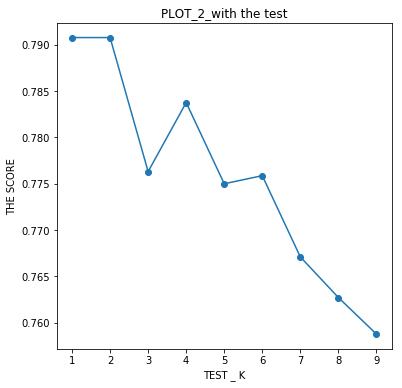

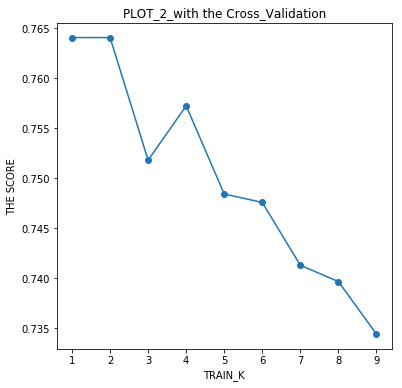

In [77]:
    first_file = 'export_dataframe.csv' ## Q3 - classification
    df3 = pd.read_csv(first_file)
  
    X = df3.iloc[:, 1:14].values
    Y = df3.iloc[:, 15].values
    print(Y)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.121)
    k1=run_k_iterations_on_train_test(X_train,Y_train,X_test,Y_test,10)
    k2= run_k_iterations_on_train (X_train , Y_train ,10)
    total_rows = len(df3.index)
    P = (sum(Y)/int(total_rows))
    print("if we had decide to classify every song as a over 50 song group a.k.a 1 , the percanage of the correctness would be",P)
    
    

In [78]:
def calculate_prob (y_train,x_train,x_test, k , i):
    y=np.array(y_train)
    for j in range(len(y)):
        if y[j] == i:
            y[j]=1
        else:
            y[j]=0
    classifier = KNeighborsClassifier(n_neighbors=k ,weights='distance')
    classifier.fit(X_train, y)
    Y_pred = classifier.predict(X_test)
    return Y_pred

In [105]:
def find_predtiction (y_test, group):
    y=np.array(y_test)
    for i in range(len(y)) :
        if y[i] == group :
            y[i] = 1 
        else :
            y[i] = 0
    sum1 = sum(y)
    total_rows = len(y)
    p = sum1 / total_rows
    print("the probability is ",p , "the group is:",group)
    return p

In [128]:
def one_vs_rest(x_test, p0, p1, p2, p3 , p4):
    one_versus_rest = np.array([])
    for j in range(len(x_test)):
        if max(p0[j], p1[j], p2[j],p3[j],p4[j]) == p0[j]:
            one_versus_rest = np.append(one_versus_rest, 0)
        elif  max(p0[j], p1[j], p2[j],p3[j],p4[j]) == p1[j]:
            one_versus_rest = np.append(one_versus_rest, 1)
        elif  max(p0[j], p1[j], p2[j],p3[j],p4[j]) == p2[j]:
            one_versus_rest = np.append(one_versus_rest, 2)
        elif max(p0[j], p1[j], p2[j],p3[j],p4[j]) == p3[j]:
            one_versus_rest = np.append(one_versus_rest, 3)
        elif max(p0[j], p1[j], p2[j],p3[j],p4[j]) == p4[j]:
            one_versus_rest = np.append(one_versus_rest, 4)
    return one_versus_rest

In [129]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

the probability is  0.10921052631578948 the group is: 0
the probability is  0.13464912280701755 the group is: 1
the probability is  0.34035087719298246 the group is: 2
the probability is  0.33596491228070174 the group is: 3
the probability is  0.07982456140350877 the group is: 4
the normalaize probability [0.10921052631578948, 0.13464912280701755, 0.34035087719298246, 0.33596491228070174, 0.07982456140350877]


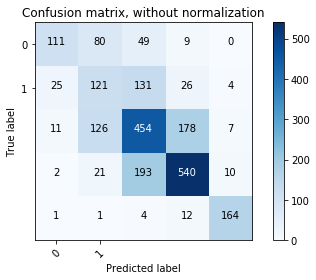

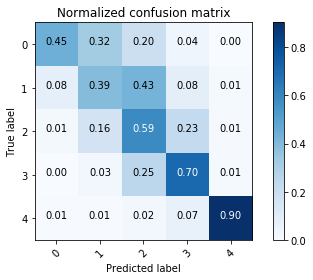

[[111  80  49   9   0]
 [ 25 121 131  26   4]
 [ 11 126 454 178   7]
 [  2  21 193 540  10]
 [  1   1   4  12 164]]


In [131]:
    X = df3.iloc[:, 1:14].values
    Y = df3.iloc[:, 19].values
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.121)
    probability_list = list()
    for i in range(0,5):
        p = find_predtiction(Y_test , i )
        probability_list.append(p)
    norm = [float(i)/sum(probability_list) for i in probability_list]
    print("the normalaize probability",norm)
    prob_dict = dict()
    for i in range(0,5):
        y_pred=calculate_prob (Y_train,X_train,X_test, k2 , i)
        y=np.array(y_pred)
        z = list()
        for j in range(len(y)):
            if(y[j] != 0):
                x = float(y[j])
                x =float (x* norm[i])
                z.append(float(x))
            else:
                x = float(y[j])
                z.append(x)
        prob_dict[i] = z
    y_pred = one_vs_rest(X_test,  prob_dict[0],  prob_dict[1],prob_dict[2],  prob_dict[3], prob_dict[4])
    cnf_matrix = confusion_matrix(Y_test, y_pred)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[0,1],
              title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3,4], normalize=True,
              title='Normalized confusion matrix')

    plt.show()


    print(confusion_matrix(Y_test, y_pred))

our conclusion is the following :
1.both in KNN on train with CV and KNN with train test we achieved better percatage than pick  1 for every row , 60 percent against 75-80 on the best K , and 70 - 75 on the worse cases . 
2.the best k to pick would be between 1 to 5 and as long as we are increasing the K there is bigger probability for mistake would increase . 